In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random
import copy

In [9]:
samples = 100
# function to yield energies and step acceptance for different distances between 2 molecules
def test_step_acceptance(mol1,mol2, universe):
  e_current = mc.get_energy(mol1, universe)
  inter = mc.inter_dist(mol1,mol2)
  print(inter)
  dists = np.linspace(0.1,inter, samples) # evenly spaced distances between
  delta_moves = [(mol2.pos - mol1.pos) - np.array([0.,0.,mol2.radius]) - np.array([0.,0.,mol1.radius]) - np.array([0.,0.,dist]) for dist in dists][::-1]
  print(delta_moves)
  energies = []
  accepts = []
  for move in delta_moves:  
      mol_copy = copy.deepcopy(mol1)
      #print(type(move[0]))
      #print(type(mol1.pos[0]))
      mol_copy.move(move)

      #calculate energy for potential new location
      e_new = mc.get_energy(mol1, universe, mol_copy)

      # if move is accepted, make the real molecule perform the step
      accepted = fc.accept_move(e_current,e_new, mc.BETA)

      energies.append(e_new)
      accepts.append(accepted)
  
  return e_current, energies, accepts

In [10]:
#define universe
box_const_size = 500
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 2
seed = 1313

# create 2 mole universe
mol1, mol2 = mc.Molecule(np.array([100.,100.,100.]), 100.), mc.Molecule(np.array([100.,100.,325.]), 100.)
uni = mc.SimpleUniverse(box_size, num_molecules,[],seed,own_molecules=[mol1,mol2])

# get metrics
e_current, energy, accepts = test_step_acceptance(mol1,mol2, uni)

25.0
[array([0., 0., 0.]), array([0.        , 0.        , 0.25151515]), array([0.       , 0.       , 0.5030303]), array([0.        , 0.        , 0.75454545]), array([0.        , 0.        , 1.00606061]), array([0.        , 0.        , 1.25757576]), array([0.        , 0.        , 1.50909091]), array([0.        , 0.        , 1.76060606]), array([0.        , 0.        , 2.01212121]), array([0.        , 0.        , 2.26363636]), array([0.        , 0.        , 2.51515152]), array([0.        , 0.        , 2.76666667]), array([0.        , 0.        , 3.01818182]), array([0.        , 0.        , 3.26969697]), array([0.        , 0.        , 3.52121212]), array([0.        , 0.        , 3.77272727]), array([0.        , 0.        , 4.02424242]), array([0.        , 0.        , 4.27575758]), array([0.        , 0.        , 4.52727273]), array([0.        , 0.        , 4.77878788]), array([0.        , 0.        , 5.03030303]), array([0.        , 0.        , 5.28181818]), array([0.        , 0.        , 

(100,)


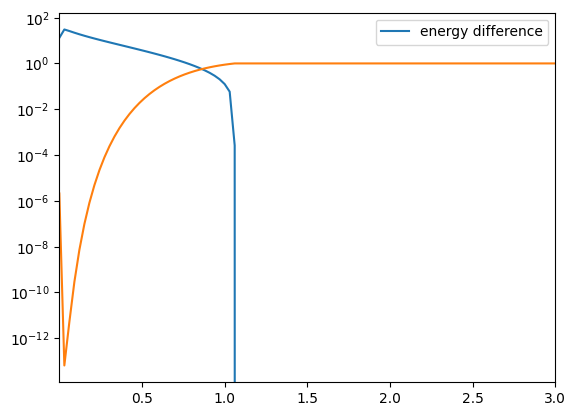

In [19]:
x = np.linspace(0.00001,3, 100)
print(x.shape)
plt.figure()
#plt.plot(x, energy)
plt.plot(x, (energy-e_current)[::-1], label = "energy difference")
plt.plot(x, [get_prob(e_current,e,1) for e in energy][::-1])
plt.yscale("log")
plt.xlim([0.00001,3])
plt.legend()
plt.show()

In [ ]:
# m1 = np.array([100.,100.,100.])
# m2 = np.array([100.,100.,325.])
# dif = m2-m1
# norm = np.sqrt(np.sum(dif**2))
# print(norm)
# print(dif)
# print(np.linalg.norm(m2-m1))

In [ ]:
### THIS FUCNTION SHOULD NOT GIVE A WARNING
import warnings

def get_acc(ePrev,eNew,Beta):
  x1 = eNew-ePrev
  x2 = -Beta*x1
  return x1, x2
    

In [ ]:
a = np.array([(1,2),(3,4),(5,6)])

b = a[:,0]
b

array([1, 3, 5])

In [12]:
def get_prob(ePrev,eNew,Beta):
  proba = min(1, np.exp(-Beta*(eNew-ePrev)))
  return proba

[(-2.0, 4.670624224433288e+20), (-1.9292929292929293, 4.505501145791707e+20), (-1.8585858585858586, 4.3403780671501264e+20), (-1.7878787878787878, 4.175254988508545e+20), (-1.7171717171717171, 4.010131909866964e+20), (-1.6464646464646464, 3.8450088312253835e+20), (-1.5757575757575757, 3.679885752583803e+20), (-1.5050505050505052, 3.514762673942222e+20), (-1.4343434343434343, 3.3496395953006405e+20), (-1.3636363636363638, 3.1845165166590604e+20), (-1.2929292929292928, 3.019393438017479e+20), (-1.2222222222222223, 2.8542703593758985e+20), (-1.1515151515151516, 2.6891472807343174e+20), (-1.0808080808080809, 2.5240242020927367e+20), (-1.0101010101010102, 2.3589011234511556e+20), (-0.9393939393939394, 2.1937780448095748e+20), (-0.8686868686868687, 2.0286549661679937e+20), (-0.797979797979798, 1.863531887526413e+20), (-0.7272727272727273, 1.6984088088848322e+20), (-0.6565656565656566, 1.533285730243251e+20), (-0.5858585858585859, 1.3681626516016701e+20), (-0.5151515151515151, 1.2030395729600

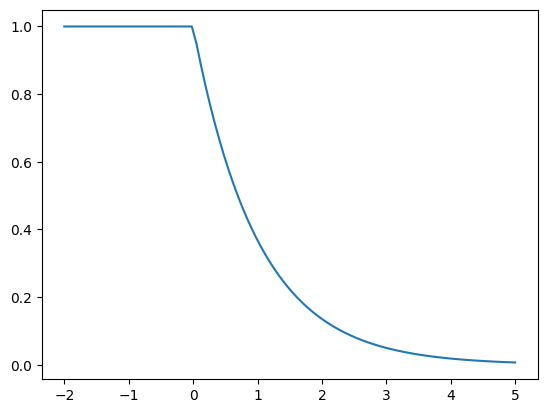

In [ ]:
x = np.linspace(-2,5, 100)
k_boltz = 1.380649E-23
temp = k_boltz * mc.TEMPERATURE

res = [get_acc(0,xi,(1/temp)) for xi in x]
res_prob = [get_prob(0,xi,(1)) for xi in x]
print(res)
list1, list2 = zip(*res)
plt.figure()

plt.plot(x,res_prob)

plt.show()

In [ ]:
import scipy.constants as consts


print(consts)

<module 'scipy.constants' from 'd:\\Program_files\\anaconda3\\envs\\OSTV2\\lib\\site-packages\\scipy\\constants\\__init__.py'>


In [ ]:
print(uni.molecules[0].pos)
print(uni.molecules[1].pos)

[100. 100. 100.]
[100. 100. 325.]


In [ ]:
orces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
print(forces)
# print(ep)
# mol1.move(np.array([0,0,23]))

# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)






NameError: name 'forces' is not defined

In [ ]:
#Plot relationship between interdistance and energy
inter = mc.inter_dist(mol1,mol2)
#print(inter)
dists = np.linspace(0.1,inter, samples)
#print(dists)
acc_rate = [get_acc(e_current,e, mc.BETA) for e in energy]
print(acc_rate)
# plt.figure()
# #plt.plot(dists,acc_rate, label = "acceptance probability for given distance")
# plt.plot(dists, energy, label = "Energy for given distance")
# plt.xlim([0,25])
# plt.legend()
# plt.show()


[1.0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\EmilR\AppData\Local\Temp\ipykernel_35380\3307302905.py:5: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-Beta*(eNew- ePrev))


In [ ]:
forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)
# mol1.move(np.array([0,0,23]))

# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)


In [ ]:
print(uni.molecules[0].pos)
print(uni.molecules[1].pos)
print(mol1.pos)
print(mol2.pos)

[100. 100. 100.]
[100. 100. 325.]
[100. 100. 100.]
[100. 100. 325.]


In [ ]:
def pls_work(mol_fixed, mol_moved, universe): #compute the energy of all molecules with respect to
  idx = universe.molecules.index(mol_fixed)
  nbs = [m for m in universe.molecules]
  del nbs[idx]
  energy = sum([fc.total_force_molecule(mol_moved,m2) for m2 in nbs])
  return energy

In [ ]:
m1_copy = copy.deepcopy(mol1)

# x = pls_work(mol1,m1_copy, uni)
# print(x)

m1_copy.move(np.array([0.,0.,23.]))
x = pls_work(mol1,m1_copy, uni)
print(x)

11.25565253970488
